In [1]:
import os
import cv2
import keras
import numpy as np
import tensorflow as tf
#from google.colab.patches import cv2_imshow
from keras.callbacks import ModelCheckpoint
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.models import Model, Sequential
from tensorflow.keras.layers import Dense, Conv2D, Dropout, BatchNormalization, Input,Conv2DTranspose, add, Activation, LeakyReLU

In [2]:
def Res_block():
    _input = Input(shape=(None, None, 3))

    conv1 = Conv2D(filters=3, kernel_size=(3, 3), strides=(1, 1), padding='same', activation='relu')(_input)
    R1 = Activation('relu')(conv1)
    conv2 = Conv2D(filters=3, kernel_size=(3, 3), strides=(1, 1), padding='same', activation='linear')(R1)
    #conv3 = Conv2D(filters=3, kernel_size=(3, 3), strides=(1, 1), padding='same', activation='linear')(conv2)

    out = add(inputs=[_input, conv1,conv2])
    #out = Activation('relu')(out)

    model1 = Model(inputs=_input, outputs=out)

    return model1
model1 = Res_block()

In [3]:
model1.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_1 (InputLayer)        [(None, None, None, 3)]      0         []                            
                                                                                                  
 conv2d (Conv2D)             (None, None, None, 3)        84        ['input_1[0][0]']             
                                                                                                  
 activation (Activation)     (None, None, None, 3)        0         ['conv2d[0][0]']              
                                                                                                  
 conv2d_1 (Conv2D)           (None, None, None, 3)        84        ['activation[0][0]']          
                                                                                              

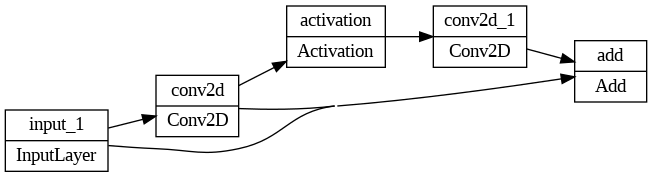

In [4]:
tf.keras.utils.plot_model(
    model1, to_file='model.png', show_shapes=False, show_layer_names=True, rankdir='LR', expand_nested=False, dpi=96
)